In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Load the Iris dataset
iris= pd.read_csv('/content/drive/My Drive/Iris.csv')

In [ ]:
#gather dataset info
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.050667,3.758667,1.198667,1.000000
std,0.828066,0.423036,1.764420,0.763161,0.819232
min,4.300000,2.050000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.050000,6.900000,2.500000,2.000000


In [ ]:
iris.info()

In [ ]:
iris[iris.columns[0]].value_counts()

150    1
56     1
54     1
53     1
52     1
      ..
100    1
99     1
98     1
97     1
1      1
Name: Id, Length: 150, dtype: int64

In [ ]:
#let us drop "Id" as the values are unique and is not useful for model
iris= iris.drop(['Id'],axis=1)

In [ ]:
#using getdummies let us encode "Species" column to numeric dtype
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
iris['Species']=le.fit_transform(iris['Species'])
print(iris.head())
print(iris['Species'].unique())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0
[0 1 2]


In [ ]:
#the dataset doesn't have nulls, let us look for outliers if any
import matplotlib.pyplot as plt
iris.boxplot(figsize=(10,15))
plt.show()

In [ ]:
#let us remove outliers for "Sepal Width" as outliers are present as per box plot
q1 = iris['SepalWidthCm'].quantile(.25)
q3 = iris['SepalWidthCm'].quantile(.75)
IQR = q3-q1
iris['SepalWidthCm'] = np.clip(iris['SepalWidthCm'],q1-1.5*IQR, q3+1.5*IQR)

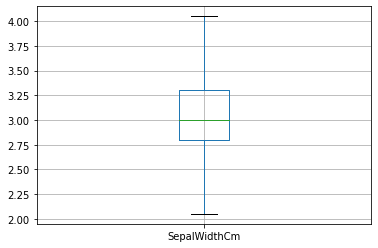

In [ ]:
#Cross check the "sepalWidthCm" column for outliers
import matplotlib.pyplot as plt
iris.boxplot(column=[iris.columns[1]])
plt.show()

In [ ]:
X=iris.drop(['Species'],axis=1)
Y=iris['Species']

In [ ]:
print("Input for my ML model: \n",X.head())
print("Output for my ML model : \n", Y.head())

Applying Decision Tree

In [ ]:
#call the model
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=0)

In [ ]:
#fit the model
clf = dt_model.fit(X, Y)

In [ ]:
#Use the fitted model for prediction on test dataset
y_predicted = clf.predict(X)
print(y_predicted)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(Y,y_predicted))
print(classification_report(Y,y_predicted))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score

In [ ]:
print('Accuracy:', accuracy_score(Y, y_predicted))
print('f1_score:', f1_score(Y, y_predicted,pos_label='positive',average='micro'))
print('recall_score:', recall_score(Y, y_predicted,pos_label='positive',average='micro'))
print('precision_score:', precision_score(Y, y_predicted,pos_label='positive',average='micro'))

Accuracy: 0.9733333333333334
f1_score: 0.9733333333333334
recall_score: 0.9733333333333334
precision_score: 0.9733333333333334


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [ ]:
#importing necessary packages
import pandas as pd
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

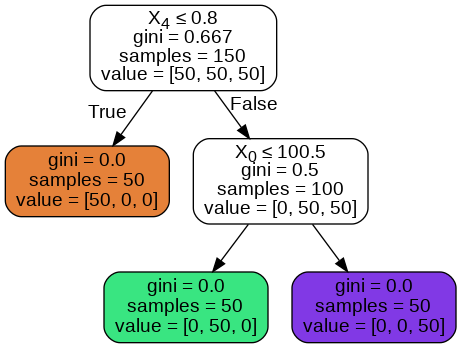

In [ ]:
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=None,  
                         class_names=None,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())